In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform

In [5]:
class Perceptron:
    
    #Constructor
    def __init__(self,n):
        self.stepsize = 0.01
        self.inputsize = n
        self.weights = np.random.random(n)
        self.bias = n * np.random.random()
        self.inputfeatures = np.matrix.transpose(0*self.weights)
        self.output = 0
        self.numiter = 1000
        
    #Get output
    def getOutput(self):
        return self.output
    
    #Get weights
    def getWeights(self):
        return self.weights
    
    #Get bias
    def getBias(self):
        return self.bias
    
    #Set weights
    def setWeights(self,w):
        self.weights = w
        
    #Set bias
    def setBias(self,b):
        self.bias = b
        
    #Display
    def display(self):
        print('Weights:',self.weights)
        print('Bias:',self.bias)
        
    def check(self,inp):
        if inp.shape[0] != self.inputsize:
            self.output = -1
        else:
            self.inputfeatures = inp
            z = self.bias + np.matmul(self.weights,inp)
            
            #Sigmoid function response
            #self.output = 1 / (1 + np.exp(-z))
            
            # Step function response
            if z > 0:
                self.output = 1
            else:
                self.output = 0
        return self
    
    #Train
    def train(self,inp,out):
        if inp.shape[0] != self.inputsize:
            print('Wrong Input Size!!!')
        else:
            self = self.check(inp)
            if self.output != out:
                count = 0
                while count < self.numiter and out != self.output:
                    self.weights = self.weights + self.stepsize*(out - self.output) * np.matrix.transpose(inp)
                    self.bias = self.bias + self.stepsize*(out - self.output)
                    self = self.check(inp)
                    count += 1
            return self
        
        
        

(-0.5, 1199.5, 800.5, -0.5)

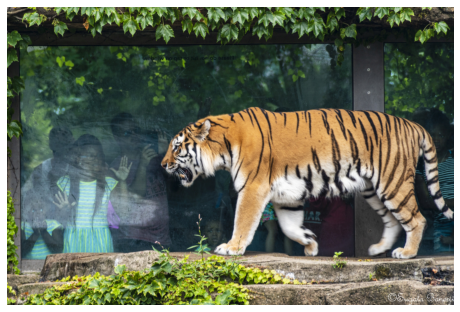

In [7]:
INPUTSIZE = 3
p = Perceptron(INPUTSIZE)

image = io.imread('../data/tiger/tiger1.jpg')
fig = plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')




(-0.5, 1199.5, 800.5, -0.5)

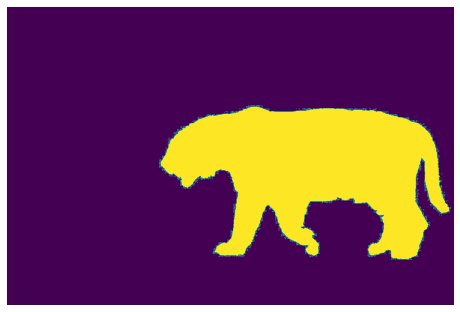

In [8]:
mask = io.imread('../data/tiger/tiger1_mask.jpg')
mask = np.int16(mask>0)
fig = plt.figure(figsize=(8, 8))
plt.imshow(mask)
plt.axis('off')

In [9]:
images = range(1,2)

for i in images:
    filename = '../data/tiger/tiger' + str(i) + '.jpg'
    maskname = '../data/tiger/tiger' + str(i) + '_mask.jpg'
    image = io.imread(filename)
    mask = io.imread(maskname)
    mask = np.int16(mask>0) # To make the values at the edges 0 or 1 (they change due to jpeg compression)
    pixels = np.reshape(image,[image.shape[0]*image.shape[1],3])
    labels = np.reshape(mask,[mask.shape[0]*mask.shape[1]])

    if i==1:
        train = pixels
        trainlabels = labels
    else:
        train = np.concatenate((train,pixels),axis = 0)
        trainlabels = np.concatenate((trainlabels,labels),axis = 0)

print(train.shape)
print(trainlabels.shape)

(2883600, 3)
(2883600,)


In [10]:
NUMTRAIN = train.shape[0]
idx = np.array(range(NUMTRAIN))
np.random.shuffle(idx)
train = train[idx]
trainlabels = trainlabels[idx]
for i in range(NUMTRAIN):
    p = p.train(np.matrix.transpose(train[i,:]),trainlabels[i])
print('Training done.')

Training done.


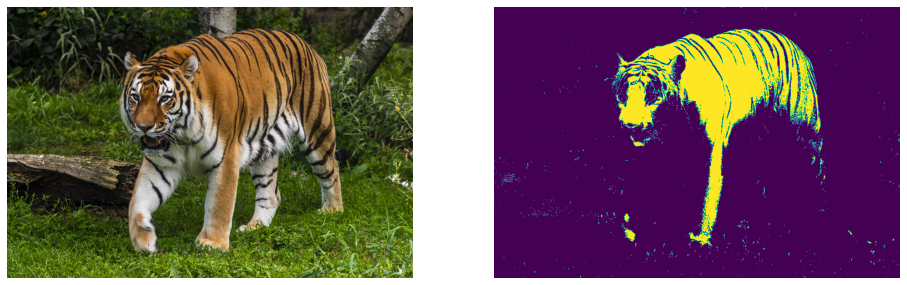

In [11]:
testimage = np.float32(io.imread('../data/tiger/tiger.jpg'))

pixels2 = np.reshape(testimage,(testimage.shape[0]*testimage.shape[1],3))

labels2 = []
for pixel in pixels2:
    labels2.append(p.check(pixel).getOutput())
labels2 = np.array(labels2)

newimage = np.reshape(labels2,(testimage.shape[0],testimage.shape[1]))


fig = plt.figure(figsize=(16, 16)) 
ax = fig.add_subplot(1,2,1)
ax.imshow(np.uint8(testimage))
ax.axis('off')
ax = fig.add_subplot(1,2,2)
ax.imshow(newimage)
ax.axis('off')

plt.show()

In [15]:
arr = np.random.random((100,2))
arr

array([[0.50146757, 0.70181205],
       [0.62036221, 0.44082039],
       [0.10298952, 0.38745128],
       [0.08052302, 0.74116202],
       [0.22587535, 0.06454922],
       [0.18784577, 0.40446246],
       [0.89242759, 0.22837962],
       [0.85235375, 0.56734278],
       [0.92011835, 0.14886898],
       [0.81013796, 0.62540829],
       [0.81993762, 0.79994003],
       [0.24715379, 0.22048233],
       [0.3532306 , 0.20183047],
       [0.95970145, 0.76823928],
       [0.93625301, 0.59321621],
       [0.61226616, 0.09589915],
       [0.39716786, 0.68749158],
       [0.99245767, 0.62771352],
       [0.65959927, 0.93185976],
       [0.84861565, 0.84107013],
       [0.60582399, 0.11941704],
       [0.29148379, 0.67273942],
       [0.37656145, 0.09636473],
       [0.97321054, 0.1391918 ],
       [0.22947037, 0.15166902],
       [0.30269656, 0.85547716],
       [0.4359375 , 0.3888672 ],
       [0.39973986, 0.44722894],
       [0.18015654, 0.14559275],
       [0.79332682, 0.44146346],
       [0.